In [48]:
# Machine Learning Engineering HW #5
# Nicholas March
# 661848406

# Imports
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from keras import optimizers
from tensorflow.python.keras.optimizers import *
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

Feature Training Data Shape: (42000, 32, 32, 3)
Feature Testing Data Shape: (18000, 32, 32, 3)
Target Training Data Shape: (42000, 10)
Target Testing Data Shape: (18000, 10)

Model Accuracy: 0.6399


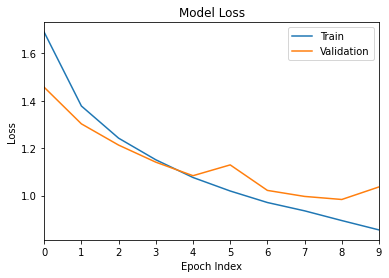

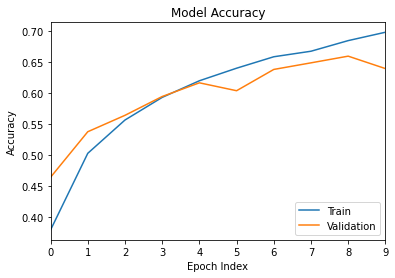

In [51]:
# Problem 1

# Input data and combine together
a, b = keras.datasets.cifar10.load_data()
x_data = np.concatenate((a[0],b[0]))
y_data = np.concatenate((a[1],b[1]))

# Split data into training and testing arrays
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=0)

# Convert the target data into one-hot encoded vectors
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Normalize feature data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Display data shapes
print("Feature Training Data Shape:",x_train.shape)
print("Feature Testing Data Shape:",x_test.shape)
print("Target Training Data Shape:",y_train.shape)
print("Target Testing Data Shape:",y_test.shape)

# Define CNN model
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(5, 5),strides=(1, 1), padding='valid', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2),  strides=(2,2)))
model.add(Conv2D(filters=32, kernel_size=(3, 3),strides=(1, 1), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),  strides=(2,2)))
model.add(Conv2D(filters=32, kernel_size=(3, 3),strides=(1, 1), padding='valid', activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile CNN model
opt = optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_test, y_test),
                    epochs=10, batch_size=64, 
                    validation_split=0.3, verbose=0)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

# Output model accuracy
print("\nModel Accuracy:",round(test_acc,4))

# Plot loss curve
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlim(0, 9)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch Index')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot accuracy curve
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlim(0, 9)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch Index')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

Including convolutional layers into the neural network provided substantial improvements, yielding an accuracy of 0.6399. This is an improvement of 0.1014 over the accuracy of the neural network optimized with GridSearch CV from homework 4, which was 0.5385. In addition, the accuracy and loss plots are much smoother and both exhibit limited oscillatory behavior/noise , unlike the traditional neural netork results. On top of all of that, the CNN required only 10 epochs, an entire order of magnitude less than the traditional network. This significantly improved runtime.

Ratio of Malignancies to Benign Data Points: 0.5938
If not ~ 1, indicates imbalanced dataset

Features: ['area_worst', 'compactness_worst', 'concavity_worst']
Feature Training Data Shape: (398, 3)
Feature Testing Data Shape: (171, 3)
Target Training Data Shape: (398,)
Target Testing Data Shape: (171,)

Linear SVM Accuracy: 0.92398
RBF SVM Accuracy: 0.93567


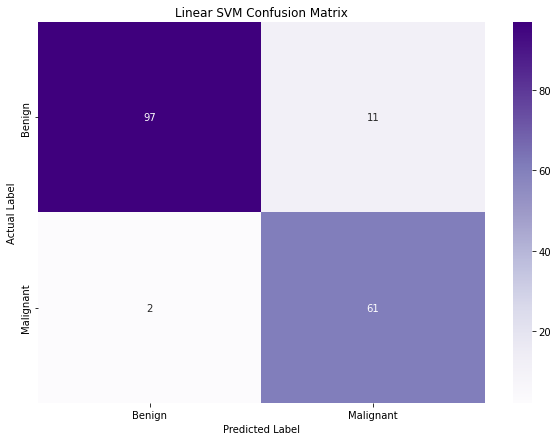

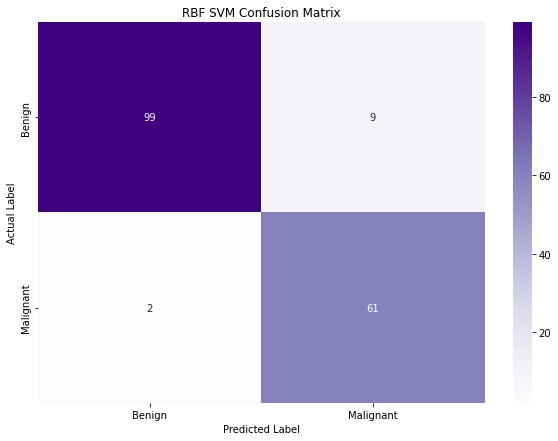


Linear SVM Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.90      0.94       108
           1       0.85      0.97      0.90        63

    accuracy                           0.92       171
   macro avg       0.91      0.93      0.92       171
weighted avg       0.93      0.92      0.92       171


RBF SVM Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95       108
           1       0.87      0.97      0.92        63

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.93       171
weighted avg       0.94      0.94      0.94       171



In [50]:
# Problem 2

# Upload and format BCW data
class_labels = ['Benign', 'Malignant']
f = open("bcw_data_worst.csv", "r")
feature_names = f.readline().strip().split(",")[1:]
x = []
y = []
malignant = 0.0
benign = 0.0
for line in f:
    splt = line.strip().split(",")
    if splt[0] == "M":     # Redefine y-label, malignant==1, benign==0
        malignant += 1.0
        y.append(1)
    elif splt[0] == "B":
        benign += 1.0
        y.append(0)
    x.append(np.array(splt[1:]).astype(float))
f.close()
x = np.array(x)
y = np.array(y)
print("Ratio of Malignancies to Benign Data Points:",round((malignant / benign),4))
print("If not ~ 1, indicates imbalanced dataset")
  
# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Display data shapes
print("\nFeatures:",feature_names)
print("Feature Training Data Shape:",x_train.shape)
print("Feature Testing Data Shape:",x_test.shape)
print("Target Training Data Shape:",y_train.shape)
print("Target Testing Data Shape:",y_test.shape)

# Define and implement linear SVM model
clf_linear = make_pipeline(StandardScaler(), SVC(kernel="linear", class_weight='balanced', gamma="scale"))
clf_linear.fit(x_train, y_train)
lin_accuracy = clf_linear.score(x_test, y_test)
lin_pred = clf_linear.predict(x_test)
lin_cm = confusion_matrix(y_test, lin_pred)
lin_report = classification_report(y_test, lin_pred)

# Define and implement RBF SVM model
clf_rbf = make_pipeline(StandardScaler(), SVC(kernel="rbf", gamma="scale", class_weight='balanced', C=2.0))
clf_rbf.fit(x_train, y_train)
rbf_accuracy = clf_rbf.score(x_test, y_test)
rbf_pred = clf_rbf.predict(x_test)
rbf_cm = confusion_matrix(y_test, rbf_pred)
rbf_report = classification_report(y_test, rbf_pred)

# Print accuracies
print("\nLinear SVM Accuracy:", round(lin_accuracy,5))
print("RBF SVM Accuracy:", round(rbf_accuracy,5))

# Plot confusion matrix for linear SVM
plt.figure(figsize=(10,7))
ax = sns.heatmap(lin_cm, annot=True, fmt="d", cmap="Purples")
ax.set_xticklabels(['Benign', 'Malignant'])
ax.set_yticklabels(['Benign', 'Malignant'], va='center')
plt.title("Linear SVM Confusion Matrix")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Plot confusion matrix for RBF SVM
print()
plt.figure(figsize=(10,7))
ax = sns.heatmap(rbf_cm, annot=True, fmt="d", cmap="Purples")
ax.set_xticklabels(['Benign', 'Malignant'])
ax.set_yticklabels(['Benign', 'Malignant'], va='center')
plt.title("RBF SVM Confusion Matrix")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

print("\nLinear SVM Classification Report:\n", lin_report)
print("\nRBF SVM Classification Report:\n", rbf_report)

Based on accuracy and other classification report metrics as well as the generated confusion matrices, it can be shown that the radial basis function (RBF) SVM is only marginally better than the linear SVM, with an accuracy improvement of 0.01169. The RBF SVM classified two more cases correctly than the linear model.